# 인공지능 과제 #1 / 18010091 경영학과 정강민

In [1]:
# MNIST 데이터는 숫자들이 넘파이 형식으로 구성되어 있음
import numpy as np
import pandas as pd

# 이미지 출력을 위한 라이브러리
import matplotlib.pyplot as plt

# 분석을 위한 tensorflow
import tensorflow as tf

In [2]:
# Sequential 클래스 각 레이어를 순서대로 쌓아서 모델을 만들 때 이용함
from tensorflow.keras.models import Sequential

# Flatten: 이미지나 다차원 데이터를 1차원으로 펼치는데 사용됨
# Dense: Fully connected layer를 정의하는 데 사용됨
from tensorflow.keras.layers import Flatten, Dense

# one-hot encoding을 위한 모듈
from tensorflow.keras.utils import to_categorical

# 1) 데이터를 탐색하여 데이터의 구조와 샘플 개수, 레이블 등을 파악하고 주석으로 설명하시오.

- MNIST 데이터셋은 이미지와 레이블로 구성됨
- MNIST 데이터셋은 28X28 픽셀 크기의 흑백 이미지로 구성되어 있으며, 각 이미지는 28X28 픽셀의 2D 배열로 표현됨
- MNIST 데이터셋은 총 7만개의 이미지로 구성되어 있으며, 6만개는 모델을 학습시키는 train 데이터이고, 1만개는 모델의 성능을 평가하는 test 데이터임
- MNIST 데이터셋의 레이블은 0부터 9까지의 정수로 구성되어 있음

In [3]:
# MNIST 데이터셋을 로드합니다.
mnist = tf.keras.datasets.mnist
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
# 데이터 구조 살펴보기

# train 데이터는 모델을 학습시킬때 사용
print('x_train 데이터 shape : ', x_train.shape)
print('y_train 데이터 shape : ', y_train.shape)

# test 데이터는 모델의 성능을 테스트할 때 사용
print('x_test 데이터 shape : ', x_test.shape)
print('y_test 데이터 shape : ', y_test.shape)

x_train 데이터 shape :  (60000, 28, 28)
y_train 데이터 shape :  (60000,)
x_test 데이터 shape :  (10000, 28, 28)
y_test 데이터 shape :  (10000,)


In [5]:
# 레이블 살펴보기
unique_labels = list(set(y_train))
print('레이블 구성 : ', unique_labels)

레이블 구성 :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


# 2) 10번째 샘플 이미지를 출력하시오.

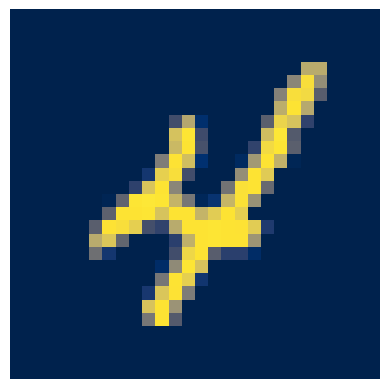

10번째 숫자는 4 입니다.


In [6]:
plt.imshow(x_train[9], cmap='cividis')

# 축 숨겨주기
plt.axis('off')

# 이미지와 레이블 출력하기
# 10번째 샘플 이미지는 4임
plt.show()
print('10번째 숫자는', y_train[9], '입니다.')

# 3) 훈련 세트에서 처음 25개 이미지와 클래스 이름을 출력하시오.

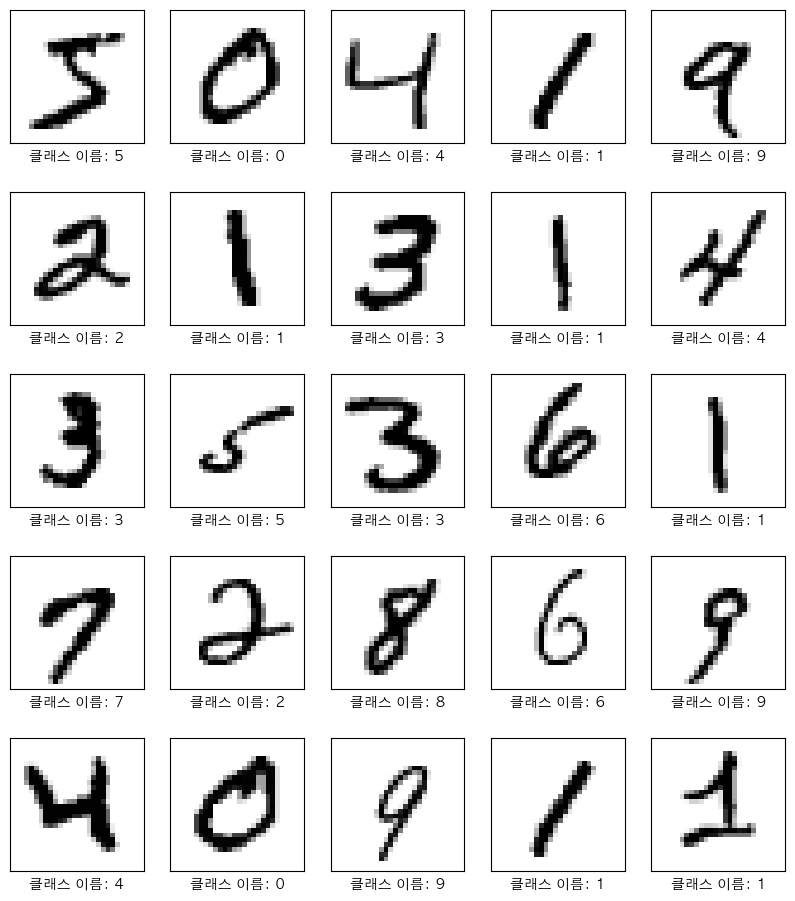

In [7]:
# x_train 세트에서 처음 25개 이미지와 클래스 이름(각 이미지의 레이블)을 출력함
plt.figure(figsize=(10, 10))
plt.subplots_adjust(bottom=0)  # 하단 여백 조정

# 폰트 설정을 변경하여 맥북용 폰트인 AppleGothic를 설정함
plt.rcParams['font.family'] = 'AppleGothic'

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])  # x축 눈금 제거
    plt.yticks([])  # y축 눈금 제거
    plt.imshow(x_train[i], cmap=plt.cm.binary)  # 이미지 출력
    plt.xlabel(f"클래스 이름: {y_train[i]}") # 클래스 이름 출력

plt.show()

## - 데이터 전처리

In [8]:
# 모델은 단순한 정수를 처리하는것보다 0~1 사이의 실수를 처리할 때 더 좋은 성능을 보임. 따라서 이미지 데이터를 [0, 1] 범위로 정규화함
# 이미지는 0~255의 픽셀값으로 이루어져 있기 때문에 이미지에 255를 나눠줘 전처리를 진행함
x_train, x_test = x_train / 255.0, x_test / 255.0

### 입력 데이터 전처리

In [9]:
# 그림의 크기 : 28 * 28
input_shape = x_train.shape[1] * x_train.shape[2]  

# 레이블의 종류. 0~9로 10개
number_of_classes = len(set(y_train))

# 3차원을 2차원으로 변경해줍니다.(각 이미지의 2D 그리드(28x28)가 1D 벡터(784,)로 변환됨)
x_train = x_train.reshape(-1, input_shape)
x_test = x_test.reshape(-1, input_shape)

print(f"x_train_shape: {x_train.shape}")  
print(f"x_test_shape: {x_test.shape}")

x_train_shape: (60000, 784)
x_test_shape: (10000, 784)


### 출력 데이터 전처리

In [10]:
# 원 핫 인코딩(One-hot Encoding) 진행
y_train = to_categorical(y_train, number_of_classes)
y_test = to_categorical(y_test, number_of_classes)

print(f"y_train_shape: {y_train.shape}")
print(f"y_test_shape: {y_test.shape}")

y_train_shape: (60000, 10)
y_test_shape: (10000, 10)


# 4) 예시 코드를 따라 모델을 구성하고, 각 과정에 대해 주석으로 설명하시오.

문제의 요구사항에 따라 dropout layer은 제외한다.
- Dropout layer : 학습 과정에서 일부 뉴런의 연결을 임의로 비활성화 시켜 오버피팅을 방지함

In [28]:
from tensorflow.keras.models import Sequential  # 레이어를 층층히 쌓아가는 연쇄 모델
from tensorflow.keras.layers import Dense  # 완전연결층

In [13]:
model = Sequential()  # 모델 선언

# 완전연결층 추가. 처음 쌓는 레이어는 input_shape: 데이터 차원(개수 제외)을 적어줘야함.
model.add(Dense(128, activation="relu", input_shape=x_train.shape[1:]))

# 출력하는 완전연결층 추가. 다중분류이므로, softmax 활성화함수 사용
model.add(Dense(y_train.shape[1], activation="softmax"))

# 모델 컴파일. 다중분류이므로 categorical_crossentropy, 정확도 표기
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["acc"])

model.summary()  # 간단하게 요약해 출력

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
predictions = model(x_train[:1]).numpy()
predictions

array([[0.06960038, 0.08857661, 0.14077656, 0.09600379, 0.08211641,
        0.09605435, 0.07808066, 0.12197755, 0.1465955 , 0.08021817]],
      dtype=float32)

In [15]:
tf.nn.softmax(predictions).numpy()

array([[0.0969736 , 0.09883136, 0.10412738, 0.09956813, 0.09819496,
        0.09957317, 0.09779946, 0.10218817, 0.10473506, 0.09800873]],
      dtype=float32)

In [16]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [17]:
loss_fn(y_train[:1], predictions).numpy()

ValueError: `labels.shape` must equal `logits.shape` except for the last dimension. Received: labels.shape=(10,) and logits.shape=(1, 10)

In [24]:
# 수정된 손실함수로 model 컴파일하기
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# 5) epoch를 10으로 설정하여 모델을 훈련하고, 성능에 대해 주석으로 평가하시오.

In [18]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5


ValueError: in user code:

    File "/Users/hoengbird/miniconda3/envs/tf/lib/python3.8/site-packages/keras/src/engine/training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "/Users/hoengbird/miniconda3/envs/tf/lib/python3.8/site-packages/keras/src/engine/training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/hoengbird/miniconda3/envs/tf/lib/python3.8/site-packages/keras/src/engine/training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "/Users/hoengbird/miniconda3/envs/tf/lib/python3.8/site-packages/keras/src/engine/training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/hoengbird/miniconda3/envs/tf/lib/python3.8/site-packages/keras/src/engine/training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "/Users/hoengbird/miniconda3/envs/tf/lib/python3.8/site-packages/keras/src/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/hoengbird/miniconda3/envs/tf/lib/python3.8/site-packages/keras/src/losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/hoengbird/miniconda3/envs/tf/lib/python3.8/site-packages/keras/src/losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/hoengbird/miniconda3/envs/tf/lib/python3.8/site-packages/keras/src/losses.py", line 2354, in sparse_categorical_crossentropy
        return backend.sparse_categorical_crossentropy(
    File "/Users/hoengbird/miniconda3/envs/tf/lib/python3.8/site-packages/keras/src/backend.py", line 5762, in sparse_categorical_crossentropy
        res = tf.nn.sparse_softmax_cross_entropy_with_logits(

    ValueError: `labels.shape` must equal `logits.shape` except for the last dimension. Received: labels.shape=(320,) and logits.shape=(32, 10)


In [19]:
history = model.fit(x_train, y_train, epochs=5)
loss, acc = model.evaluate(x_test, y_test)  # 학습 완료 후 검증
print("손실률:", loss)  # 손실률: 0.08662549406290054
print("정확도:", acc)  # 정확도: 0.9779999852180481

Epoch 1/5


ValueError: in user code:

    File "/Users/hoengbird/miniconda3/envs/tf/lib/python3.8/site-packages/keras/src/engine/training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "/Users/hoengbird/miniconda3/envs/tf/lib/python3.8/site-packages/keras/src/engine/training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/hoengbird/miniconda3/envs/tf/lib/python3.8/site-packages/keras/src/engine/training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "/Users/hoengbird/miniconda3/envs/tf/lib/python3.8/site-packages/keras/src/engine/training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/hoengbird/miniconda3/envs/tf/lib/python3.8/site-packages/keras/src/engine/training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "/Users/hoengbird/miniconda3/envs/tf/lib/python3.8/site-packages/keras/src/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/hoengbird/miniconda3/envs/tf/lib/python3.8/site-packages/keras/src/losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/hoengbird/miniconda3/envs/tf/lib/python3.8/site-packages/keras/src/losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/hoengbird/miniconda3/envs/tf/lib/python3.8/site-packages/keras/src/losses.py", line 2354, in sparse_categorical_crossentropy
        return backend.sparse_categorical_crossentropy(
    File "/Users/hoengbird/miniconda3/envs/tf/lib/python3.8/site-packages/keras/src/backend.py", line 5762, in sparse_categorical_crossentropy
        res = tf.nn.sparse_softmax_cross_entropy_with_logits(

    ValueError: `labels.shape` must equal `logits.shape` except for the last dimension. Received: labels.shape=(320,) and logits.shape=(32, 10)


In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)
loss, acc = model.evaluate(X_test, y_test)  # 학습 완료 후 검증
print("손실률:", loss)  # 손실률: 0.08662549406290054
print("정확도:", acc)  # 정확도: 0.9779999852180481

In [19]:
model.fit(x_train, y_train, epochs=10)

model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4726 - accuracy: 0.8993
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4891 - accuracy: 0.8978
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5063 - accuracy: 0.8978
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5237 - accuracy: 0.8971
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5497 - accuracy: 0.8940
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5622 - accuracy: 0.8950
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5821 - accuracy: 0.8948
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5946 - accuracy: 0.8952
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6194 - accuracy: 0.8947
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.635

2023-09-20 17:20:31.774087: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 - 1s - loss: 0.6960 - accuracy: 0.8972 - 1s/epoch - 3ms/step


[0.6960485577583313, 0.8971999883651733]

In [20]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [22]:
probability_model(x_test[:10])

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0.0853368 , 0.0853368 , 0.23196818, 0.0853368 , 0.08533683,
        0.08533727, 0.0853368 , 0.0853368 , 0.0853368 , 0.0853368 ],
       [0.08533674, 0.23196931, 0.08533674, 0.08533674, 0.08533674,
        0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.08533674],
       [0.08533674, 0.23196931, 0.08533674, 0.08533674, 0.08533674,
        0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.08533674],
       [0.085432  , 0.08608962, 0.085432  , 0.085432  , 0.085432  ,
        0.085432  , 0.085432  , 0.23045437, 0.085432  , 0.085432  ],
       [0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.23196931,
        0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.08533674],
       [0.08533674, 0.23196931, 0.08533674, 0.08533674, 0.08533674,
        0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.08533674],
       [0.0853445 , 0.08539687, 0.0853445 , 0.0853445 , 0.08534519,
        0.23184635, 0.0853445 , 0.0853445 , 0.0853445 , 0.08

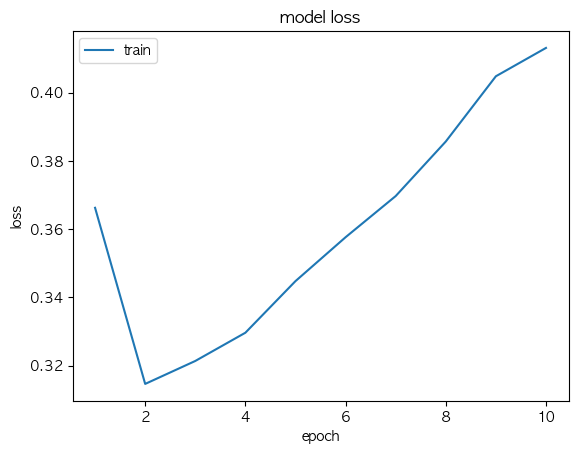

In [23]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()